# ВКР Захаров В.Ю. Постановка задача.
В ходе выполнения ВКР по курсу "Data Science" требуется сделать:

- изучить теоретические основы и методы решения поставленной задачи.
- провести разведочный анализ предложенных данных. 
- нарисовать гистограммы распределения каждой из переменной, диаграммы ящика с усами, попарные графики рассеяния точек.
- получить среднее, медианное, максимальное и минимальное значения всех показателей
- провести анализ и исключение выбросов, проверить наличие пропусков.
- провести предобработку данных (удаление шумов, нормализация и т.д.).
- обучить нескольких моделей для прогноза модуля упругости при растяжении и прочности при растяжении. При построении модели необходимо 30% данных оставить на тестирование модели, на остальных происходит обучение моделей.
- написать нейронную сеть, которая будет рекомендовать соотношение матрица-наполнитель.

Аналитическая часть о предмете исследования - базальтопластике, содержится в пояснительной записке. Здесь приводится практическая часть реализации поставленной задачи

# Реализация задачи. Загрузка и предобработка данных

1. Загрузка библиотек

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# По мере необходимости будут подгружаться дополнительные библиотеки
from google.colab import drive
drive.mount('/content/drive/') # Подключение гугл диска, для работы в Google Colab

Mounted at /content/drive/


2. Загрузка входных данных

In [2]:
import copy
x_bp = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/X_bp.xlsx',index_col=0)
x_bp.head(5)


,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2"
0,1.857143,2030.0,738.736842,30.00,22.267857,100.000000,210.0,70.0,3000.0,220.0
1,1.857143,2030.0,738.736842,50.00,23.750000,284.615385,210.0,70.0,3000.0,220.0
2,1.857143,2030.0,738.736842,49.90,33.000000,284.615385,210.0,70.0,3000.0,220.0
3,1.857143,2030.0,738.736842,129.00,21.250000,300.000000,210.0,70.0,3000.0,220.0
4,2.771331,2030.0,753.000000,111.86,22.267857,284.615385,210.0,70.0,3000.0,220.0


In [3]:
x_nup= pd.read_excel('/content/drive/MyDrive/Colab Notebooks/X_nup.xlsx',index_col=0)
x_nup.head(5)

,"Угол нашивки, град",Шаг нашивки,Плотность нашивки
0,0,4.0,57.0
1,0,4.0,60.0
2,0,4.0,70.0
3,0,5.0,47.0
4,0,5.0,57.0


3. Объединение файлов x_bp и x_nup методом inner.

In [4]:
vz_f = x_bp.join(x_nup, how='inner')
vz_f.head(5)

,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки
0,1.857143,2030.0,738.736842,30.00,22.267857,100.000000,210.0,70.0,3000.0,220.0,0,4.0,57.0
1,1.857143,2030.0,738.736842,50.00,23.750000,284.615385,210.0,70.0,3000.0,220.0,0,4.0,60.0
2,1.857143,2030.0,738.736842,49.90,33.000000,284.615385,210.0,70.0,3000.0,220.0,0,4.0,70.0
3,1.857143,2030.0,738.736842,129.00,21.250000,300.000000,210.0,70.0,3000.0,220.0,0,5.0,47.0
4,2.771331,2030.0,753.000000,111.86,22.267857,284.615385,210.0,70.0,3000.0,220.0,0,5.0,57.0


In [ ]:
# Write DataFrame to a file     
# vz_f.to_csv('/content/drive/MyDrive/Colab Notebooks/xbp_out.csv')
# vz_f.to_excel('/content/drive/MyDrive/Colab Notebooks/xbp_out.xlsx')

4. Проверка пропусков данных. Построение тепловой карты

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1023 entries, 0 to 1022
Data columns (total 13 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Соотношение матрица-наполнитель       1023 non-null   float64
 1   Плотность, кг/м3                      1023 non-null   float64
 2   модуль упругости, ГПа                 1023 non-null   float64
 3   Количество отвердителя, м.%           1023 non-null   float64
 4   Содержание эпоксидных групп,%_2       1023 non-null   float64
 5   Температура вспышки, С_2              1023 non-null   float64
 6   Поверхностная плотность, г/м2         1023 non-null   float64
 7   Модуль упругости при растяжении, ГПа  1023 non-null   float64
 8   Прочность при растяжении, МПа         1023 non-null   float64
 9   Потребление смолы, г/м2               1023 non-null   float64
 10  Угол нашивки, град                    1023 non-null   int64  
 11  Шаг нашивки      

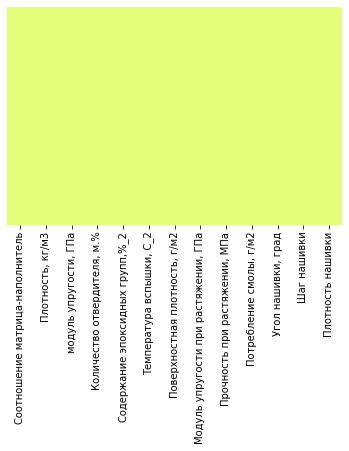

In [5]:
sns.heatmap(vz_f.isnull(), yticklabels=False, cbar=False, cmap='Wistia')
vz_f.info()

5. Проведение разведочного анализа данных

In [ ]:
vz_f.describe()

,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки
count,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000
mean,2.930366,1975.734888,739.923233,110.570769,22.244390,285.882151,482.731833,73.328571,2466.922843,218.423144,44.252199,6.899222,57.153929
std,0.913222,73.729231,330.231581,28.295911,2.406301,40.943260,281.314690,3.118983,485.628006,59.735931,45.015793,2.563467,12.350969
min,0.389403,1731.764635,2.436909,17.740275,14.254985,100.000000,0.603740,64.054061,1036.856605,33.803026,0.000000,0.000000,0.000000
25%,2.317887,1924.155467,500.047452,92.443497,20.608034,259.066528,266.816645,71.245018,2135.850448,179.627520,0.000000,5.080033,49.799212
50%,2.906878,1977.621657,739.664328,110.564840,22.230744,285.896812,451.864365,73.268805,2459.524526,219.198882,0.000000,6.916144,57.341920
75%,3.552660,2021.374375,961.812526,129.730366,23.961934,313.002106,693.225017,75.356612,2767.193119,257.481724,90.000000,8.586293,64.944961
max,5.591742,2207.773481,1911.536477,198.953207,33.000000,413.273418,1399.542362,82.682051,3848.436732,414.590628,90.000000,14.440522,103.988901


5.1 Построение гистограмм

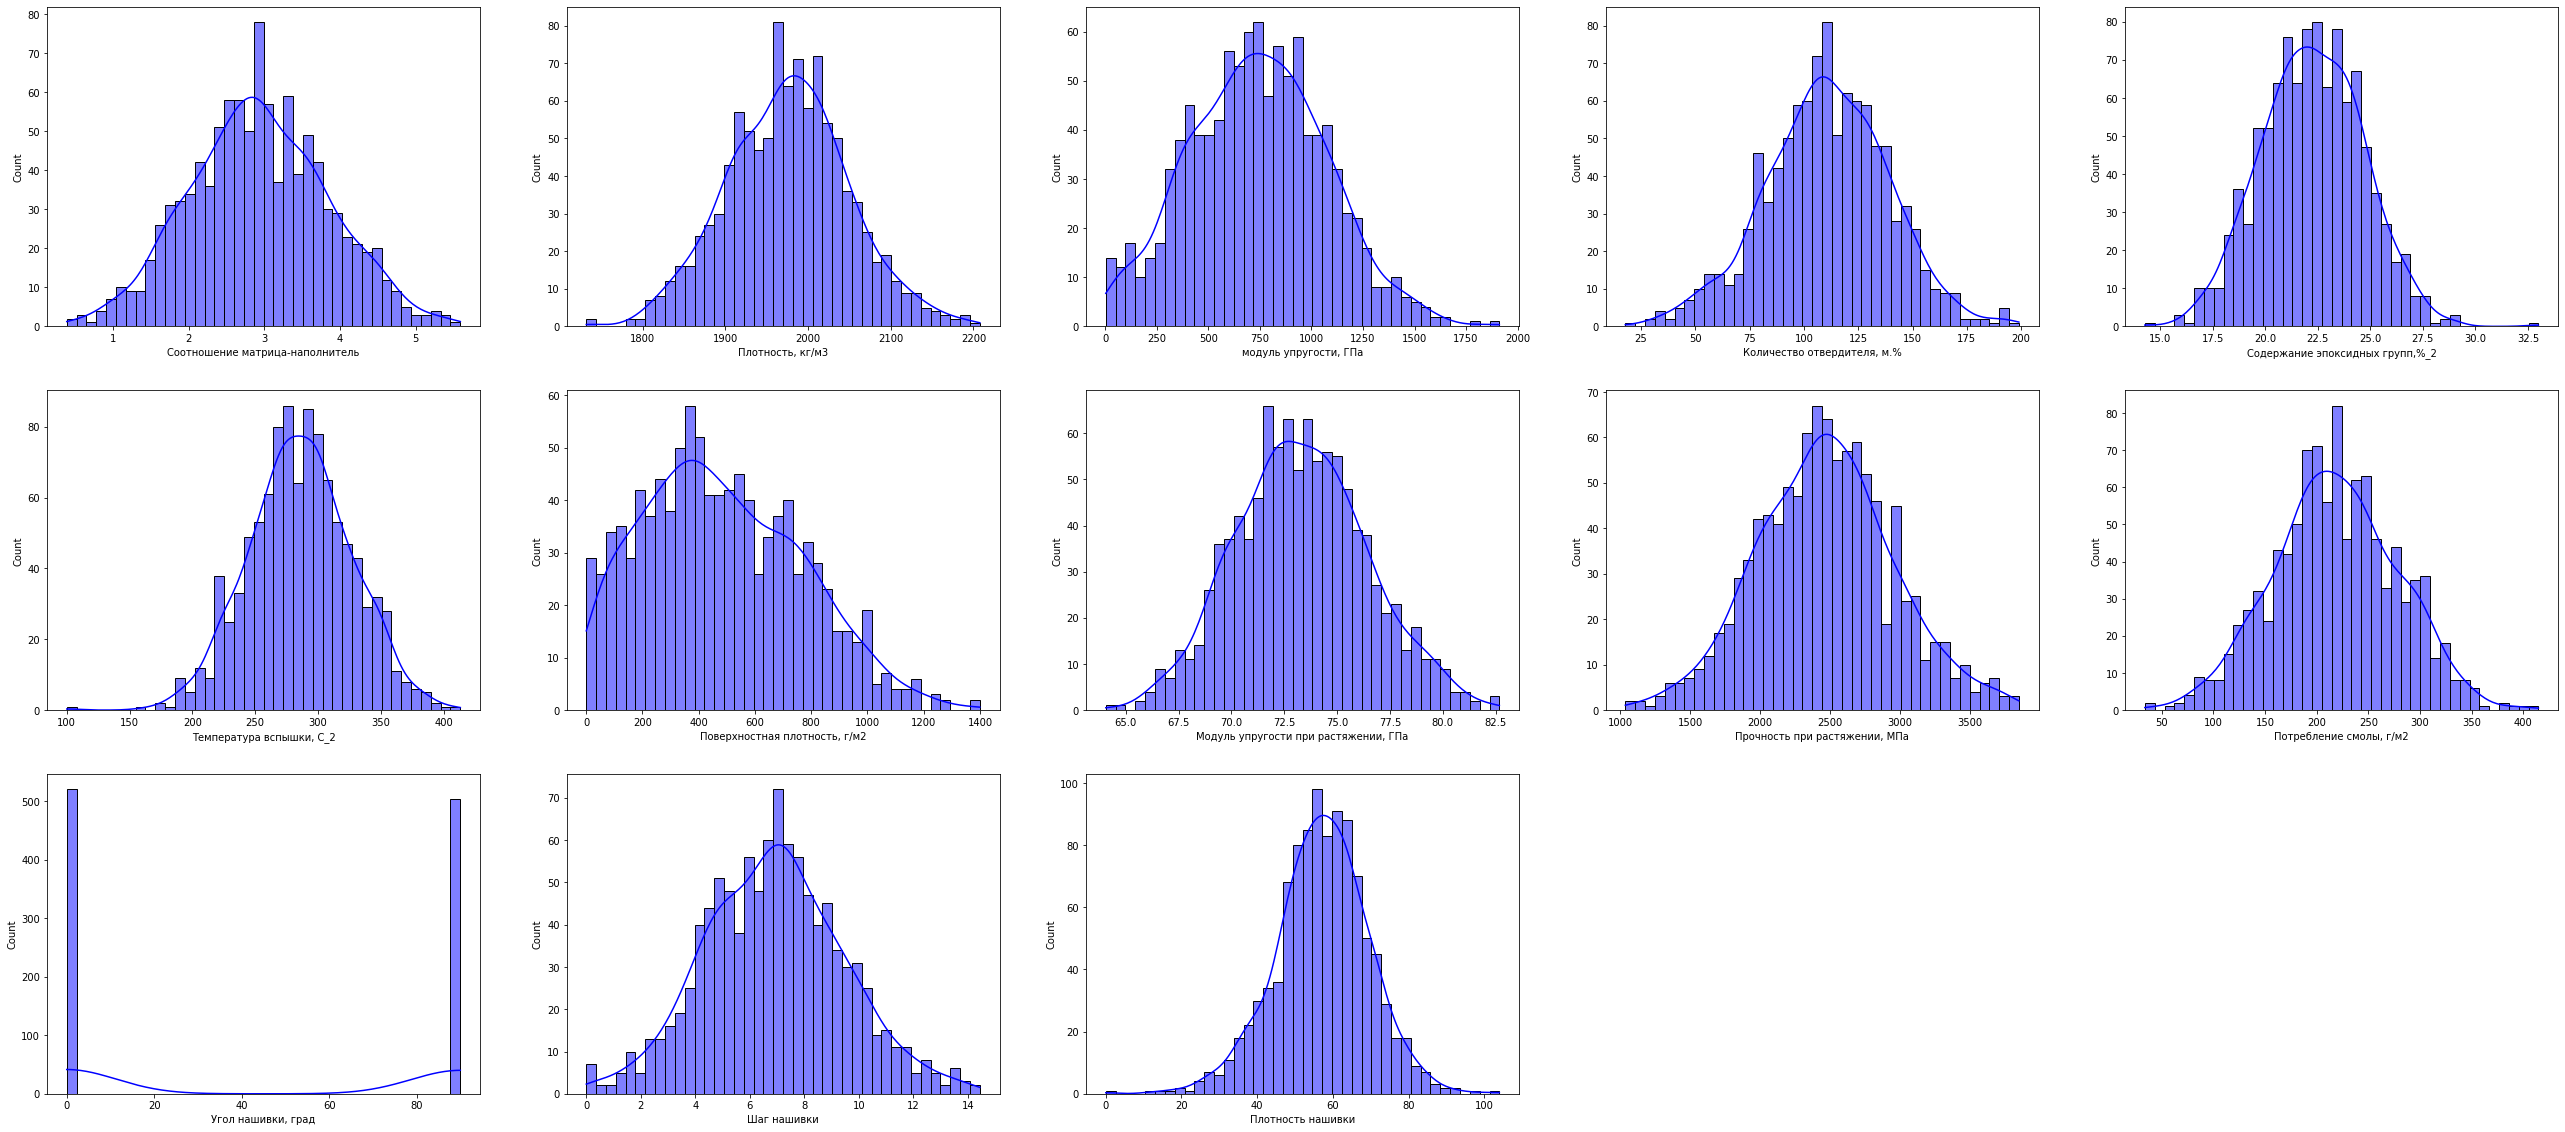

In [ ]:
a = 3
b = 5
c = 1

fig = plt.figure(figsize=(45, 20))

for i in vz_f.columns:
    plt.subplot(a, b, c)
    sns.histplot(vz_f[i], kde=True, bins=40, color='blue')
    c=c+1

Результаты:
Угол нашивки - имеет дискретное распределение.
Прочие строки имеют распределение, близкое к нормальному

In [ ]:
# sns.histplot(vz_f['Плотность, кг/м3'], kde=False, bins=40, color='yellow')

In [ ]:
# sns.histplot(vz_f['модуль упругости, ГПа'], kde=False, bins=40, color='yellow')

In [ ]:
# sns.histplot(vz_f['Количество отвердителя, м.%'], kde=False, bins=40, color='yellow')

In [ ]:
# sns.histplot(vz_f['Содержание эпоксидных групп,%_2'], kde=False, bins=40, color='yellow')

In [ ]:
# sns.histplot(vz_f['Температура вспышки, С_2'], kde=False, bins=40, color='yellow')

In [ ]:
# sns.histplot(vz_f['Поверхностная плотность, г/м2'], kde=False, bins=40, color='yellow')

In [ ]:
# sns.histplot(vz_f['Модуль упругости при растяжении, ГПа'], kde=False, bins=40, color='yellow')

In [ ]:
# sns.histplot(vz_f['Прочность при растяжении, МПа'], kde=False, bins=40, color='yellow')

In [ ]:
# sns.histplot(vz_f['Потребление смолы, г/м2'], kde=False, bins=40, color='yellow')

In [ ]:
# sns.histplot(vz_f['Угол нашивки, град'], kde=False, bins=40, color='yellow')

In [ ]:
# sns.histplot(vz_f['Шаг нашивки'], kde=False, bins=40, color='yellow')

In [ ]:
# sns.histplot(vz_f['Плотность нашивки'], kde=False, bins=40, color='yellow')

5.2 Проведение анализа на выбросы. "Ящик с усами"

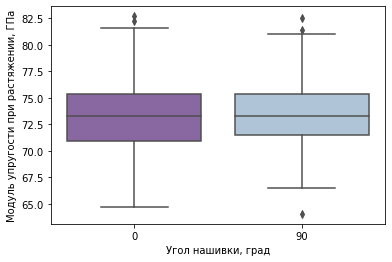

In [ ]:
sns.boxplot(x='Угол нашивки, град', y='Модуль упругости при растяжении, ГПа', data=vz_f, palette='BuPu_r')

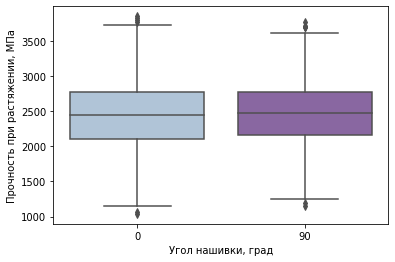

In [ ]:
sns.boxplot(x='Угол нашивки, град', y='Прочность при растяжении, МПа', data=vz_f, palette='BuPu')

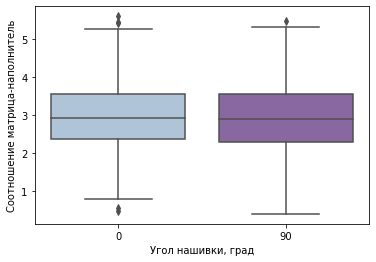

In [ ]:
sns.boxplot(x='Угол нашивки, град', y='Соотношение матрица-наполнитель', data=vz_f, palette='BuPu')

5.3 Попарные графики рассеяния точек

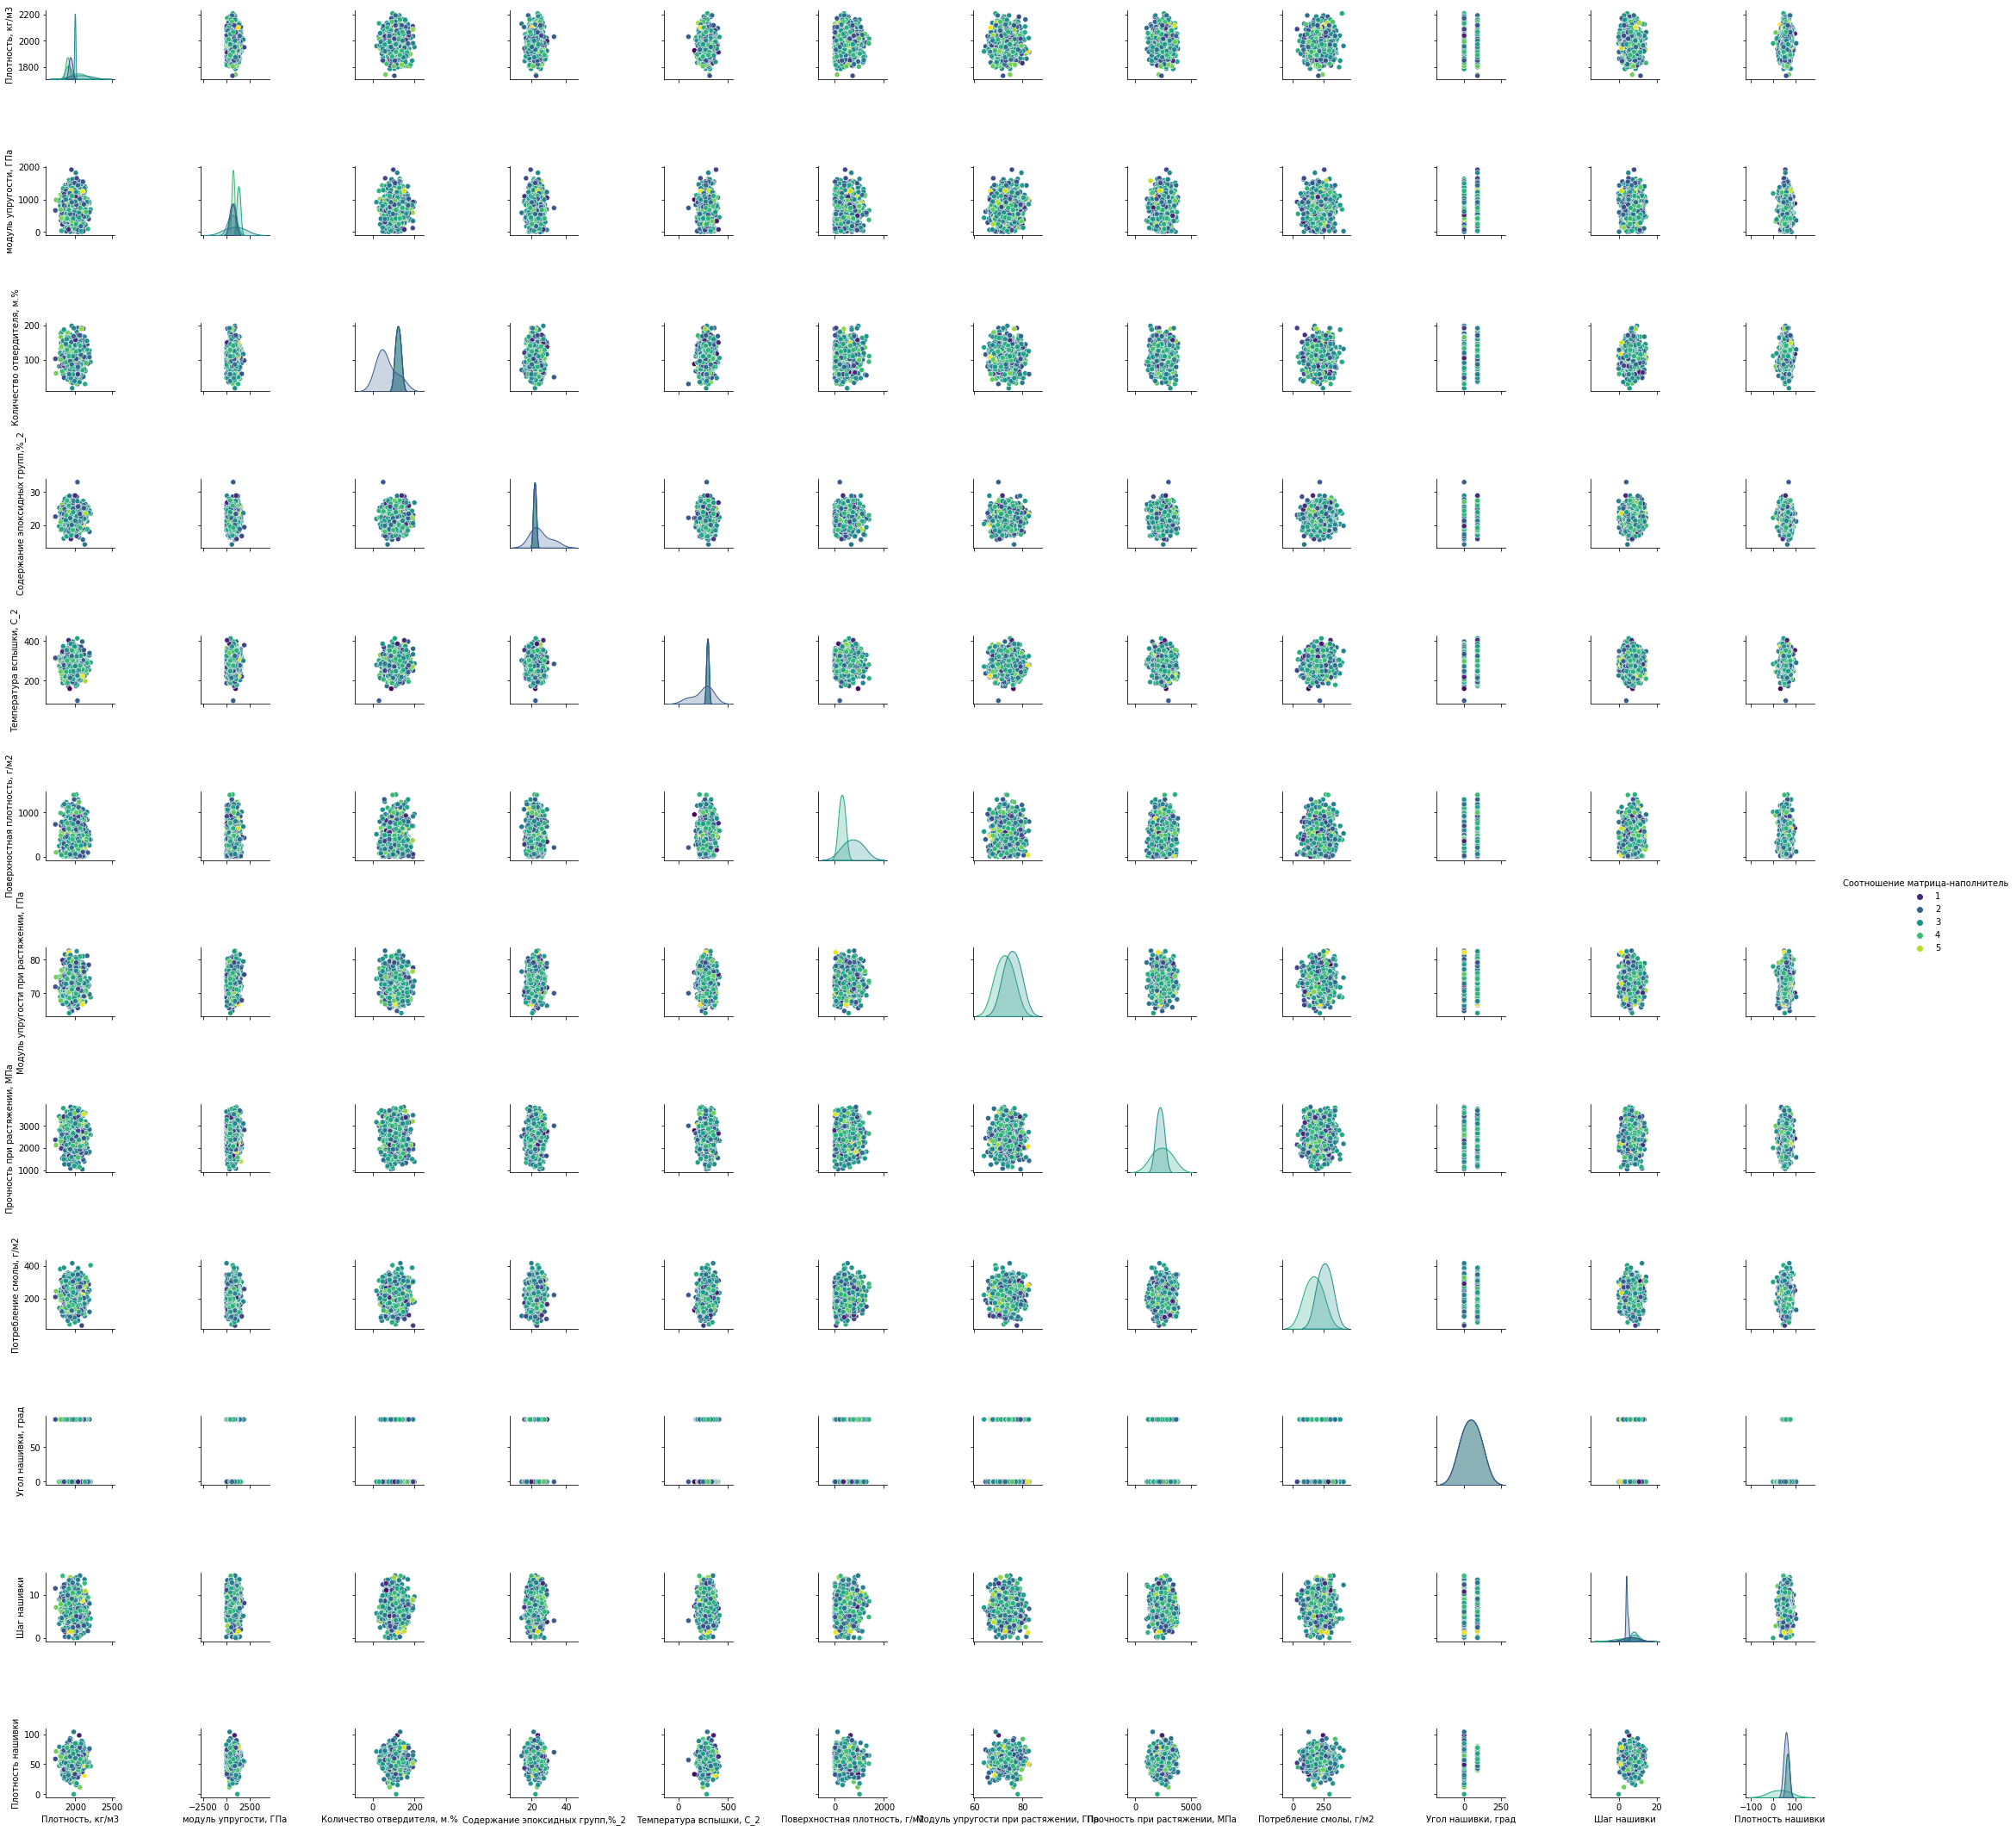

In [ ]:
sns.pairplot(data=vz_f, hue='Соотношение матрица-наполнитель', palette='viridis')

5.4 Визуализация корреляции

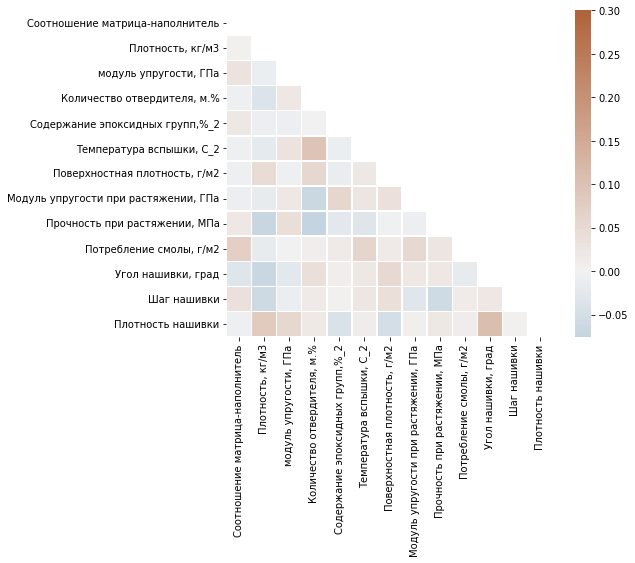

In [7]:
corr=vz_f.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))

f, ax = plt.subplots(figsize=(8, 6))

cmap = sns.diverging_palette(240, 30, as_cmap=True)

sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": 1.0})


6. Предобработка данных

6.1 Кодирование показателя "Угол нашивки, град" в 0 и 1. Метод  LabelEncoder

In [8]:

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
vz_f['Угол нашивки, град'] = le.fit_transform(vz_f['Угол нашивки, град'])
vz_f

,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки
0,1.857143,2030.000000,738.736842,30.000000,22.267857,100.000000,210.000000,70.000000,3000.000000,220.000000,0,4.000000,57.000000
1,1.857143,2030.000000,738.736842,50.000000,23.750000,284.615385,210.000000,70.000000,3000.000000,220.000000,0,4.000000,60.000000
2,1.857143,2030.000000,738.736842,49.900000,33.000000,284.615385,210.000000,70.000000,3000.000000,220.000000,0,4.000000,70.000000
3,1.857143,2030.000000,738.736842,129.000000,21.250000,300.000000,210.000000,70.000000,3000.000000,220.000000,0,5.000000,47.000000
4,2.771331,2030.000000,753.000000,111.860000,22.267857,284.615385,210.000000,70.000000,3000.000000,220.000000,0,5.000000,57.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1018,2.271346,1952.087902,912.855545,86.992183,20.123249,324.774576,209.198700,73.090961,2387.292495,125.007669,1,9.076380,47.019770
1019,3.444022,2050.089171,444.732634,145.981978,19.599769,254.215401,350.660830,72.920827,2360.392784,117.730099,1,10.565614,53.750790
1020,3.280604,1972.372865,416.836524,110.533477,23.957502,248.423047,740.142791,74.734344,2662.906040,236.606764,1,4.161154,67.629684
1021,3.705351,2066.799773,741.475517,141.397963,19.246945,275.779840,641.468152,74.042708,2071.715856,197.126067,1,6.313201,58.261074


6.2 Замена выбросов пустыми значениями. Удаление строк с выбросами

In [9]:
colnames_out = ["Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%",
         "Содержание эпоксидных групп,%_2","Температура вспышки, С_2",
         "Поверхностная плотность, г/м2","Потребление смолы, г/м2","Шаг нашивки",
         "Плотность нашивки"]
vz_out = copy.copy(vz_f)
for x in colnames_out:
    q75,q25 = np.percentile(vz_out.loc[:,x],[75,25])
    intr_qr = q75-q25
    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)
    vz_out.loc[vz_out[x]<min,x] = np.nan
    vz_out.loc[vz_out[x]>max,x] = np.nan

In [10]:
vz_out.isnull().sum()

Соотношение матрица-наполнитель          0
Плотность, кг/м3                         9
модуль упругости, ГПа                    2
Количество отвердителя, м.%             14
Содержание эпоксидных групп,%_2          2
Температура вспышки, С_2                 8
Поверхностная плотность, г/м2            2
Модуль упругости при растяжении, ГПа     0
Прочность при растяжении, МПа            0
Потребление смолы, г/м2                  8
Угол нашивки, град                       0
Шаг нашивки                              4
Плотность нашивки                       21
dtype: int64

In [11]:
# Удаление строк с выбросами
vz_out = vz_out.dropna(axis=0)
vz_out.describe()
# vz_desc=vz_out.describe() 
# vz_desc.to_excel('/content/drive/MyDrive/Colab Notebooks/vz_desc.xlsx')

,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки
count,957.000000,957.000000,957.000000,957.000000,957.000000,957.000000,957.000000,957.000000,957.000000,957.000000,957.000000,957.000000,957.000000
mean,2.933738,1974.193875,739.599153,110.856754,22.213022,285.835897,481.336613,73.311418,2465.397211,217.751190,0.507837,6.893380,57.347373
std,0.907396,70.931572,328.149349,26.963744,2.389377,39.468318,279.573099,3.113507,483.224494,57.865568,0.500200,2.525845,11.286243
min,0.389403,1784.482245,2.436909,38.668500,15.695894,179.374391,0.603740,64.054061,1036.856605,63.685698,0.000000,0.037639,27.272928
25%,2.319322,1923.255135,501.498475,92.618011,20.576898,259.141151,266.492473,71.252628,2137.271408,179.581459,0.000000,5.082856,50.052099
50%,2.906878,1977.302956,739.664328,110.979100,22.187619,285.896812,454.855550,73.253725,2455.555556,219.179155,1.000000,6.930538,57.532956
75%,3.551654,2020.429160,962.135964,129.821713,23.962165,312.790306,692.271085,75.321098,2757.130303,256.784428,1.000000,8.586120,64.622002
max,5.591742,2161.565216,1649.415706,181.828448,28.955094,386.067992,1291.340115,82.682051,3848.436732,359.052220,1.000000,13.732404,86.012427


6.3 Нормализация данных после удаления выбросов

In [12]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
vz_norm = pd.DataFrame(mms.fit_transform(vz_out), columns=vz_out.columns, index=vz_out.index)
vz_norm.to_excel('/content/drive/MyDrive/Colab Notebooks/vz_norm.xlsx')
vz_norm.describe()

,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки
count,957.000000,957.000000,957.000000,957.000000,957.000000,957.000000,957.000000,957.000000,957.000000,957.000000,957.000000,957.000000,957.000000
mean,0.489075,0.503103,0.447585,0.504249,0.491517,0.515069,0.372449,0.496960,0.508092,0.521608,0.507837,0.500610,0.511997
std,0.174421,0.188106,0.199243,0.188347,0.180205,0.190951,0.216600,0.167141,0.171869,0.195911,0.500200,0.184439,0.192141
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.370971,0.368017,0.303016,0.376848,0.368122,0.385918,0.205998,0.386438,0.391387,0.392379,0.000000,0.368405,0.387800
50%,0.483912,0.511348,0.447624,0.505104,0.489602,0.515364,0.351932,0.493862,0.504591,0.526442,1.000000,0.503324,0.515156
75%,0.607852,0.625716,0.582703,0.636723,0.623437,0.645477,0.535870,0.604845,0.611853,0.653760,1.000000,0.624215,0.635843
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Использование методов регрессии

7. Прогнозирование модуля упругости при растяжении методом линейной регрессии

7.1 Разделение на тестовую и обучающуюся выборки (30% и 70%)

In [13]:
from sklearn.model_selection import train_test_split
# Прогнозируемый покзатель
target = vz_norm['Модуль упругости при растяжении, ГПа']
# исключаем данные, которые планируем прогнозировать
train = vz_norm.drop(['Модуль упругости при растяжении, ГПа',
                      'Прочность при растяжении, МПа',
                      'Соотношение матрица-наполнитель'],axis=1)

# target.describe()
# train.describe()
X_trn, X_tst, Y_trn, Y_tst = train_test_split(train, target, test_size=0.3)


In [14]:
from sklearn.linear_model import LinearRegression, LogisticRegression

lin_reg_mod = LinearRegression()
lin_reg_mod.fit(X_trn, Y_trn)
pred = lin_reg_mod.predict(X_tst)
# pred

In [15]:
from sklearn.metrics import mean_squared_error, r2_score
test_rmse = np.sqrt(mean_squared_error(Y_tst, pred))
test_r2 = r2_score(Y_tst, pred)
print(f"rmse -",test_rmse)
print(f"r2 score-",test_r2)

rmse - 0.16662487936876172
r2 score- -0.011319686452859301


Линейная регрессия подтвердила отсутствие линейной зависимости, что и предполагалось, исходя из данных корреляционной матрицы

7.2 Линейная регрессия для показателя: "Прочность при растяжении, МПа"

In [16]:
target = vz_norm['Прочность при растяжении, МПа']
train = vz_norm.drop(['Модуль упругости при растяжении, ГПа',
                     'Прочность при растяжении, МПа',
                     'Соотношение матрица-наполнитель'],axis=1)

X_trn, X_tst, Y_trn, Y_tst = train_test_split(train, target, test_size=0.3)

lin_reg_mod = LinearRegression()
lin_reg_mod.fit(X_trn, Y_trn)
pred = lin_reg_mod.predict(X_tst)

test_rmse = np.sqrt(mean_squared_error(Y_tst, pred))
test_r2 = r2_score(Y_tst, pred)
print(f"rmse -",test_rmse)
print(f"r2 score-",test_r2)

rmse - 0.16408564092642847
r2 score- -0.02975549658668375


7.3 "Случайный лес" для прогнозирования показателя "Прочность при растяжении, МПа"

In [17]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=1000, max_depth=8)
model.fit(X_trn, Y_trn)
pred_rfor = model.predict(X_tst)

print(f"r2_score", r2_score(Y_tst, pred_rfor), f"результат далек от 1")


r2_score -0.00512375021773348 результат далек от 1


# Построение нейронной сети

8. Построение нейронной сети для "Соотношение матрицы-наполнителя"

In [18]:
import tensorflow
from tensorflow import keras
from keras.models import Sequential 
from keras.layers import Dense
import datetime

tensorflow.__version__

'2.8.0'

In [19]:
target = vz_norm['Соотношение матрица-наполнитель']
train = vz_norm.drop(['Соотношение матрица-наполнитель'],axis=1)

# target.head(10)


In [20]:
X_trn, X_tst, Y_trn, Y_tst = train_test_split(train, target, test_size=0.3)
# print(X_trn.shape)
# print(X_tst.shape)
# print(Y_trn.shape)
# print(Y_tst.shape)


In [21]:
model = Sequential([
    Dense(128, activation = 'relu', input_dim=12),
    Dense(64, activation = 'relu'),
    Dense(16, activation = 'relu'),
    Dense(1),
    ])

model.compile(optimizer='adam', 
              loss='mean_absolute_error', 
              metrics=['mean_squared_error'])

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               1664      
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 16)                1040      
                                                                 
 dense_3 (Dense)             (None, 1)                 17        
                                                                 
Total params: 10,977
Trainable params: 10,977
Non-trainable params: 0
_________________________________________________________________


In [22]:
def plot_loss(mod_graf):
    plt.plot(mod_graf.history['loss'], label='loss')
    plt.ylim([0.05, 0.4])
    plt.xlabel('Эпоха')
    plt.ylabel('mean_absolute_error')
    plt.legend()
    plt.grid(True)

Epoch 1/50
21/21 [==============================] - 2s 16ms/step - loss: 0.1810 - mean_squared_error: 0.0522
Epoch 2/50
21/21 [==============================] - 0s 12ms/step - loss: 0.1488 - mean_squared_error: 0.0334
Epoch 3/50
21/21 [==============================] - 0s 18ms/step - loss: 0.1464 - mean_squared_error: 0.0331
Epoch 4/50
21/21 [==============================] - 0s 19ms/step - loss: 0.1451 - mean_squared_error: 0.0326
Epoch 5/50
21/21 [==============================] - 0s 15ms/step - loss: 0.1441 - mean_squared_error: 0.0322
Epoch 6/50
21/21 [==============================] - 0s 20ms/step - loss: 0.1421 - mean_squared_error: 0.0317
Epoch 7/50
21/21 [==============================] - 0s 11ms/step - loss: 0.1406 - mean_squared_error: 0.0309
Epoch 8/50
21/21 [==============================] - 0s 16ms/step - loss: 0.1386 - mean_squared_error: 0.0304
Epoch 9/50
21/21 [==============================] - 0s 13ms/step - loss: 0.1388 - mean_squared_error: 0.0306
Epoch 10/50
21/21 [

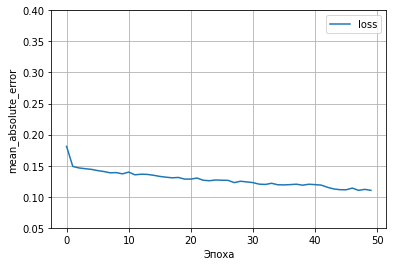

In [23]:
log_dir = "/content/drive/MyDrive/Colab Notebooks/logs/log" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tensorflow.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)
mod_graf = model.fit(X_trn, Y_trn, epochs=50, callbacks=[tensorboard_callback])
plot_loss(mod_graf)


In [24]:
model.evaluate(X_tst, Y_tst)

9/9 [==============================] - 0s 2ms/step - loss: 0.1484 - mean_squared_error: 0.0352


[0.1483544558286667, 0.03520715609192848]

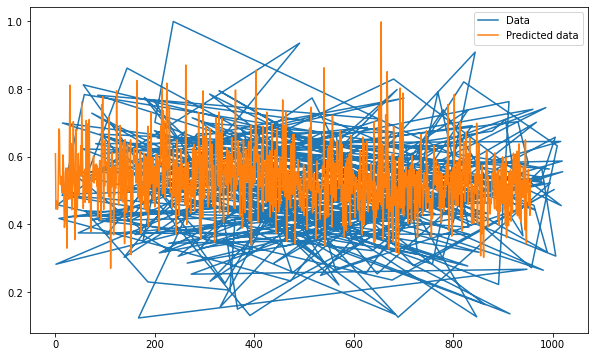

In [26]:
Y_pred=model.predict(train)
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(Y_tst, label='Data')
ax.plot(Y_pred, label='Predicted data')
ax.legend()
plt.show()

9. Проверка работы модели нейронной сети

Проверка проводится путем ввода входных данных через excel файл.
- путем ввода нормализованных данных;
- путем ввода обычных данных.

In [27]:
# Прогноз Соотношения матрицы наполнителя - входные данные нормализованные
test1 = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/test1.xlsx',index_col=0)
test1

,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки
0,0.503,0.448,0.504,0.445,0.525,0.375,0.622,0.46,0.59,1,0.45,0.57


In [28]:
predict1=model.predict(test1)
print(f"Нормализованный прогноз",predict1)
print(f"Cоотношение матрицы-наполнителя",vz_out['Соотношение матрица-наполнитель'].min()+predict1*(vz_out['Соотношение матрица-наполнитель'].max()-vz_out['Соотношение матрица-наполнитель'].min()))

Нормализованный прогноз [[0.43511966]]
Cоотношение матрицы-наполнителя [[2.6530426]]


In [29]:
# Прогноз Соотношения матрицы наполнителя - входные данные обычные (как есть)
test2 = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/test2.xlsx',index_col=0)
test2

,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки
0,1950,724,88,19.5,226,477,72.5,1599,288,0,3,69


In [30]:
# Нормализация входных данных для подачи в нейронную сеть
col_names = ["Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%",
         "Содержание эпоксидных групп,%_2","Температура вспышки, С_2",
         "Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа",
         "Прочность при растяжении, МПа","Потребление смолы, г/м2","Шаг нашивки",
         "Плотность нашивки"]
test2_norm = copy.copy(test2)
for x in col_names:
  test2_norm[x]=(test2[x]-vz_out[x].min())/(vz_out[x].max()-vz_out[x].min())

test2_norm['Угол нашивки, град']=test2['Угол нашивки, град']/90
# Предполагаем, что угол нашивки может быть 0 или 90 град

test2_norm

,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки
0,0.438943,0.438113,0.34459,0.286903,0.225578,0.369089,0.4534,0.199939,0.759444,0.0,0.216313,0.710375


In [31]:
predict2=model.predict(test2_norm)
print(f"Нормализованный прогноз",predict2)
print(f"Cоотношение матрицы-наполнителя",vz_out['Соотношение матрица-наполнитель'].min()+predict2*(vz_out['Соотношение матрица-наполнитель'].max()-vz_out['Соотношение матрица-наполнитель'].min()))

Нормализованный прогноз [[0.418781]]
Cоотношение матрицы-наполнителя [[2.5680435]]


10. Сохранение модели нейронной сети

In [32]:
model.save("/content/drive/MyDrive/Colab Notebooks/models/vz_mod_nn")

INFO:tensorflow:Assets written to: /content/drive/MyDrive/Colab Notebooks/models/vz_mod_nn/assets
